In [1]:
# =============================================================================
# NOTEBOOK 04 : CONSTRUCTION DU MODÈLE CNN
# =============================================================================
# Objectif : Créer l'architecture du réseau de neurones convolutif
#            pour la classification des gestes
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import os

# TensorFlow et Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

print("="*70)
print("🧠 CONSTRUCTION DU MODÈLE CNN")
print("="*70)

# Informations sur TensorFlow
print(f"\n📦 Versions :")
print(f"   - TensorFlow : {tf.__version__}")
print(f"   - Keras      : {keras.__version__}")

# Vérifier le GPU (si disponible)
print(f"\n🖥️ Matériel disponible :")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"   ✅ GPU détecté : {len(gpus)} GPU(s)")
    for gpu in gpus:
        print(f"      {gpu}")
else:
    print(f"   ℹ️ Aucun GPU détecté - Utilisation du CPU")

# Configurer pour la reproductibilité
np.random.seed(42)
tf.random.set_seed(42)

print(f"\n⏳ Chargement des données prétraitées...\n")

# Vérifier que les fichiers existent
fichiers_requis = [
    'data/processed/X_train.npy',
    'data/processed/X_test.npy',
    'data/processed/y_train.npy',
    'data/processed/y_test.npy'
]

for fichier in fichiers_requis:
    if os.path.exists(fichier):
        taille_mb = os.path.getsize(fichier) / (1024 * 1024)
        print(f"✅ {fichier} ({taille_mb:.2f} MB)")
    else:
        print(f"❌ {fichier} MANQUANT")
        raise FileNotFoundError("Exécutez d'abord 03_preprocessing.ipynb")

# Charger les données
X_train = np.load('data/processed/X_train.npy')
X_test = np.load('data/processed/X_test.npy')
y_train = np.load('data/processed/y_train.npy')
y_test = np.load('data/processed/y_test.npy')

print(f"\n✅ Données chargées avec succès")
print(f"\n📊 Dimensions :")
print(f"   - X_train : {X_train.shape}")
print(f"   - y_train : {y_train.shape}")
print(f"   - X_test  : {X_test.shape}")
print(f"   - y_test  : {y_test.shape}")

print(f"\n📊 Informations :")
print(f"   - Type de données : {X_train.dtype}")
print(f"   - Plage de valeurs : [{X_train.min():.4f}, {X_train.max():.4f}]")
print(f"   - Nombre de classes : {len(np.unique(y_train))}")

🧠 CONSTRUCTION DU MODÈLE CNN

📦 Versions :
   - TensorFlow : 2.20.0
   - Keras      : 3.10.0

🖥️ Matériel disponible :
   ℹ️ Aucun GPU détecté - Utilisation du CPU

⏳ Chargement des données prétraitées...

✅ data/processed/X_train.npy (2.69 MB)
✅ data/processed/X_test.npy (0.90 MB)
✅ data/processed/y_train.npy (0.01 MB)
✅ data/processed/y_test.npy (0.00 MB)

✅ Données chargées avec succès

📊 Dimensions :
   - X_train : (900, 28, 28, 1)
   - y_train : (900,)
   - X_test  : (300, 28, 28, 1)
   - y_test  : (300,)

📊 Informations :
   - Type de données : float32
   - Plage de valeurs : [0.0627, 0.9569]
   - Nombre de classes : 3


In [2]:
# =============================================================================
# CRÉATION D'UN SET DE VALIDATION
# =============================================================================

print("\n" + "="*70)
print("📊 CRÉATION DU SET DE VALIDATION")
print("="*70)

from sklearn.model_selection import train_test_split

# Diviser le train set en train (80%) et validation (20%)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.2,      # 20% pour la validation
    random_state=42,
    stratify=y_train    # Garde la même distribution de classes
)

print(f"\n✅ Division effectuée :")
print(f"\n   📦 Train final :")
print(f"      - X_train : {X_train_final.shape}")
print(f"      - y_train : {y_train_final.shape}")
print(f"      - Proportion : {len(X_train_final) / len(X_train) * 100:.0f}%")

print(f"\n   📦 Validation :")
print(f"      - X_val : {X_val.shape}")
print(f"      - y_val : {y_val.shape}")
print(f"      - Proportion : {len(X_val) / len(X_train) * 100:.0f}%")

print(f"\n   📦 Test (inchangé) :")
print(f"      - X_test : {X_test.shape}")
print(f"      - y_test : {y_test.shape}")

# Vérifier la distribution des classes
print(f"\n📊 Distribution des classes :")
print(f"\n   Train :")
unique, counts = np.unique(y_train_final, return_counts=True)
for classe, count in zip(unique, counts):
    print(f"      Classe {classe} : {count} images ({count/len(y_train_final)*100:.1f}%)")

print(f"\n   Validation :")
unique, counts = np.unique(y_val, return_counts=True)
for classe, count in zip(unique, counts):
    print(f"      Classe {classe} : {count} images ({count/len(y_val)*100:.1f}%)")

print(f"\n💡 Pourquoi un set de validation ?")
print(f"   - Pour surveiller l'overfitting pendant l'entraînement")
print(f"   - Pour ajuster les hyperparamètres")
print(f"   - Le test set reste intact pour l'évaluation finale")


📊 CRÉATION DU SET DE VALIDATION

✅ Division effectuée :

   📦 Train final :
      - X_train : (720, 28, 28, 1)
      - y_train : (720,)
      - Proportion : 80%

   📦 Validation :
      - X_val : (180, 28, 28, 1)
      - y_val : (180,)
      - Proportion : 20%

   📦 Test (inchangé) :
      - X_test : (300, 28, 28, 1)
      - y_test : (300,)

📊 Distribution des classes :

   Train :
      Classe 0 : 240 images (33.3%)
      Classe 1 : 240 images (33.3%)
      Classe 2 : 240 images (33.3%)

   Validation :
      Classe 0 : 60 images (33.3%)
      Classe 1 : 60 images (33.3%)
      Classe 2 : 60 images (33.3%)

💡 Pourquoi un set de validation ?
   - Pour surveiller l'overfitting pendant l'entraînement
   - Pour ajuster les hyperparamètres
   - Le test set reste intact pour l'évaluation finale


In [3]:
# =============================================================================
# CONSTRUCTION DE L'ARCHITECTURE CNN
# =============================================================================

print("\n" + "="*70)
print("🏗️ ARCHITECTURE DU RÉSEAU DE NEURONES CONVOLUTIF")
print("="*70)

def creer_modele_cnn(input_shape=(28, 28, 1), num_classes=3):
    """
    Crée un modèle CNN pour la classification de gestes
    
    Architecture :
    --------------
    1. Bloc Convolutionnel 1 :
       - Conv2D (32 filtres, 3x3)
       - Activation ReLU
       - MaxPooling (2x2)
       
    2. Bloc Convolutionnel 2 :
       - Conv2D (64 filtres, 3x3)
       - Activation ReLU
       - MaxPooling (2x2)
       
    3. Bloc Convolutionnel 3 :
       - Conv2D (64 filtres, 3x3)
       - Activation ReLU
       
    4. Couches denses :
       - Flatten (aplatir)
       - Dense (64 neurones, ReLU)
       - Dropout (0.5 pour régularisation)
       - Dense (num_classes, softmax)
    
    Paramètres :
    -----------
    input_shape : tuple
        Forme de l'entrée (hauteur, largeur, channels)
    num_classes : int
        Nombre de classes à prédire
    
    Retourne :
    ---------
    model : keras.Model
        Modèle compilé
    """
    
    model = models.Sequential(name='CNN_Gestes')
    
    # =========================================================================
    # BLOC 1 : Première couche convolutionnelle
    # =========================================================================
    model.add(layers.Input(shape=input_shape, name='input'))
    
    model.add(layers.Conv2D(
        filters=32,           # 32 filtres (détecteurs de features)
        kernel_size=(3, 3),   # Taille du filtre 3x3
        activation='relu',
        padding='same',       # Garde la même taille
        name='conv1'
    ))
    
    model.add(layers.MaxPooling2D(
        pool_size=(2, 2),     # Réduit la taille par 2
        name='pool1'
    ))
    
    # =========================================================================
    # BLOC 2 : Deuxième couche convolutionnelle
    # =========================================================================
    model.add(layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        name='conv2'
    ))
    
    model.add(layers.MaxPooling2D(
        pool_size=(2, 2),
        name='pool2'
    ))
    
    # =========================================================================
    # BLOC 3 : Troisième couche convolutionnelle
    # =========================================================================
    model.add(layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        name='conv3'
    ))
    
    # =========================================================================
    # BLOC 4 : Couches denses (fully connected)
    # =========================================================================
    model.add(layers.Flatten(name='flatten'))
    
    model.add(layers.Dense(
        units=64,
        activation='relu',
        name='dense1'
    ))
    
    # Dropout pour éviter l'overfitting
    model.add(layers.Dropout(
        rate=0.5,             # 50% des neurones désactivés
        name='dropout'
    ))
    
    # Couche de sortie
    model.add(layers.Dense(
        units=num_classes,
        activation='softmax',  # Pour classification multi-classe
        name='output'
    ))
    
    return model


# Créer le modèle
print(f"\n🔨 Création du modèle...\n")

model = creer_modele_cnn(
    input_shape=(28, 28, 1),
    num_classes=3
)

print(f"✅ Modèle créé avec succès !")


🏗️ ARCHITECTURE DU RÉSEAU DE NEURONES CONVOLUTIF

🔨 Création du modèle...

✅ Modèle créé avec succès !


In [4]:
# =============================================================================
# RÉSUMÉ DE L'ARCHITECTURE
# =============================================================================

print("\n" + "="*70)
print("📋 RÉSUMÉ DE L'ARCHITECTURE")
print("="*70)

# Afficher le résumé
model.summary()

# Compter les paramètres
total_params = model.count_params()
print(f"\n📊 Nombre total de paramètres : {total_params:,}")

# Détails par type de couche
print(f"\n📊 Détails des couches :")

conv_layers = 0
dense_layers = 0
total_conv_params = 0
total_dense_params = 0

for layer in model.layers:
    if isinstance(layer, layers.Conv2D):
        conv_layers += 1
        total_conv_params += layer.count_params()
    elif isinstance(layer, layers.Dense):
        dense_layers += 1
        total_dense_params += layer.count_params()

print(f"   - Couches convolutionnelles : {conv_layers} ({total_conv_params:,} paramètres)")
print(f"   - Couches denses           : {dense_layers} ({total_dense_params:,} paramètres)")

print(f"\n💡 Explication des dimensions :")
print(f"   - Input  : (28, 28, 1)  → Image 28×28 en niveaux de gris")
print(f"   - Conv1  : (28, 28, 32) → 32 feature maps de 28×28")
print(f"   - Pool1  : (14, 14, 32) → Réduit par 2 avec max pooling")
print(f"   - Conv2  : (14, 14, 64) → 64 feature maps de 14×14")
print(f"   - Pool2  : (7, 7, 64)   → Réduit par 2")
print(f"   - Conv3  : (7, 7, 64)   → 64 feature maps de 7×7")
print(f"   - Flatten: (3136,)      → Aplatit en vecteur (7×7×64 = 3136)")
print(f"   - Dense  : (64,)        → 64 neurones")
print(f"   - Output : (3,)         → 3 classes (probabilités)")


📋 RÉSUMÉ DE L'ARCHITECTURE


Model: "CNN_Gestes"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,707 (1002.76 KB)

 Trainable params: 256,707 (1002.76 KB)

 Non-trainable params: 0 (0.00 B)


📊 Nombre total de paramètres : 256,707

📊 Détails des couches :
   - Couches convolutionnelles : 3 (55,744 paramètres)
   - Couches denses           : 2 (200,963 paramètres)

💡 Explication des dimensions :
   - Input  : (28, 28, 1)  → Image 28×28 en niveaux de gris
   - Conv1  : (28, 28, 32) → 32 feature maps de 28×28
   - Pool1  : (14, 14, 32) → Réduit par 2 avec max pooling
   - Conv2  : (14, 14, 64) → 64 feature maps de 14×14
   - Pool2  : (7, 7, 64)   → Réduit par 2
   - Conv3  : (7, 7, 64)   → 64 feature maps de 7×7
   - Flatten: (3136,)      → Aplatit en vecteur (7×7×64 = 3136)
   - Dense  : (64,)        → 64 neurones
   - Output : (3,)         → 3 classes (probabilités)



📊 VISUALISATION DE L'ARCHITECTURE

⏳ Génération du diagramme d'architecture...
You must install pydot (`pip install pydot`) for `plot_model` to work.
✅ Diagramme sauvegardé : results/plots/architecture_cnn.png


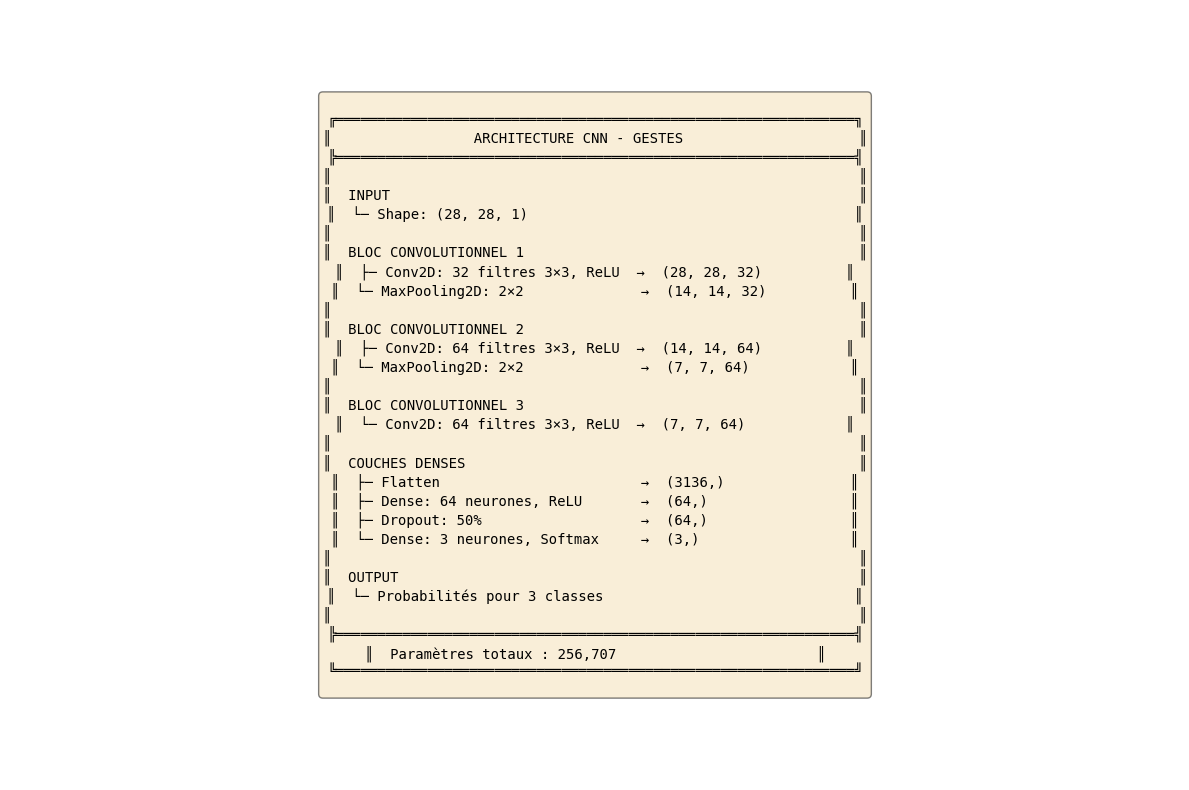

✅ Schéma sauvegardé : results/plots/architecture_schema.png


In [5]:
# =============================================================================
# VISUALISATION DE L'ARCHITECTURE
# =============================================================================

print("\n" + "="*70)
print("📊 VISUALISATION DE L'ARCHITECTURE")
print("="*70)

# Créer le dossier pour les visualisations
os.makedirs('results/plots', exist_ok=True)

# Méthode 1 : Diagramme avec plot_model
try:
    print(f"\n⏳ Génération du diagramme d'architecture...")
    
    plot_model(
        model,
        to_file='results/plots/architecture_cnn.png',
        show_shapes=True,           # Afficher les dimensions
        show_layer_names=True,      # Afficher les noms
        rankdir='TB',               # Top to Bottom
        expand_nested=True,
        dpi=150
    )
    
    print(f"✅ Diagramme sauvegardé : results/plots/architecture_cnn.png")
    
except Exception as e:
    print(f"⚠️ Impossible de créer le diagramme : {e}")
    print(f"   (Nécessite graphviz - optionnel)")

# Méthode 2 : Visualisation personnalisée
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Informations à afficher
architecture_text = f"""
╔══════════════════════════════════════════════════════════════╗
║                 ARCHITECTURE CNN - GESTES                     ║
╠══════════════════════════════════════════════════════════════╣
║                                                               ║
║  INPUT                                                        ║
║  └─ Shape: (28, 28, 1)                                       ║
║                                                               ║
║  BLOC CONVOLUTIONNEL 1                                        ║
║  ├─ Conv2D: 32 filtres 3×3, ReLU  →  (28, 28, 32)          ║
║  └─ MaxPooling2D: 2×2              →  (14, 14, 32)          ║
║                                                               ║
║  BLOC CONVOLUTIONNEL 2                                        ║
║  ├─ Conv2D: 64 filtres 3×3, ReLU  →  (14, 14, 64)          ║
║  └─ MaxPooling2D: 2×2              →  (7, 7, 64)            ║
║                                                               ║
║  BLOC CONVOLUTIONNEL 3                                        ║
║  └─ Conv2D: 64 filtres 3×3, ReLU  →  (7, 7, 64)            ║
║                                                               ║
║  COUCHES DENSES                                               ║
║  ├─ Flatten                        →  (3136,)               ║
║  ├─ Dense: 64 neurones, ReLU       →  (64,)                 ║
║  ├─ Dropout: 50%                   →  (64,)                 ║
║  └─ Dense: 3 neurones, Softmax     →  (3,)                  ║
║                                                               ║
║  OUTPUT                                                       ║
║  └─ Probabilités pour 3 classes                              ║
║                                                               ║
╠══════════════════════════════════════════════════════════════╣
║  Paramètres totaux : {total_params:,}                        ║
╚══════════════════════════════════════════════════════════════╝
"""

ax.text(0.5, 0.5, architecture_text, 
        fontsize=10, 
        family='monospace',
        ha='center', 
        va='center',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('results/plots/architecture_schema.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✅ Schéma sauvegardé : results/plots/architecture_schema.png")

In [6]:
# =============================================================================
# COMPILATION DU MODÈLE
# =============================================================================

print("\n" + "="*70)
print("⚙️ COMPILATION DU MODÈLE")
print("="*70)

# Compiler le modèle
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Optimiseur Adam
    loss='sparse_categorical_crossentropy',                # Loss pour multi-classes
    metrics=['accuracy']                                   # Métrique : accuracy
)

print(f"\n✅ Modèle compilé avec succès")

print(f"\n📊 Configuration :")
print(f"   - Optimiseur    : Adam (learning_rate=0.001)")
print(f"   - Loss function : Sparse Categorical Crossentropy")
print(f"   - Métrique      : Accuracy")

print(f"\n💡 Explications :")
print(f"   - Adam : Optimiseur adaptatif très performant")
print(f"   - Sparse Categorical Crossentropy :")
print(f"     → Pour classification multi-classes")
print(f"     → 'Sparse' car les labels sont des entiers (0, 1, 2)")
print(f"     → Pas besoin de one-hot encoding")
print(f"   - Accuracy : Pourcentage de prédictions correctes")


⚙️ COMPILATION DU MODÈLE

✅ Modèle compilé avec succès

📊 Configuration :
   - Optimiseur    : Adam (learning_rate=0.001)
   - Loss function : Sparse Categorical Crossentropy
   - Métrique      : Accuracy

💡 Explications :
   - Adam : Optimiseur adaptatif très performant
   - Sparse Categorical Crossentropy :
     → Pour classification multi-classes
     → 'Sparse' car les labels sont des entiers (0, 1, 2)
     → Pas besoin de one-hot encoding
   - Accuracy : Pourcentage de prédictions correctes



🧪 TEST DE PRÉDICTION (MODÈLE NON ENTRAÎNÉ)

⏳ Prédiction sur 5 exemples...

Exemple    Vrai label      Prédiction      Confiance
------------------------------------------------------------
1          2               2               36.10%
2          1               2               36.03%
3          2               2               36.09%
4          1               2               36.90%
5          1               2               36.28%

💡 Note : Le modèle n'est PAS encore entraîné
   Les prédictions sont aléatoires (poids initialisés aléatoirement)
   Après l'entraînement, la précision devrait être > 90%


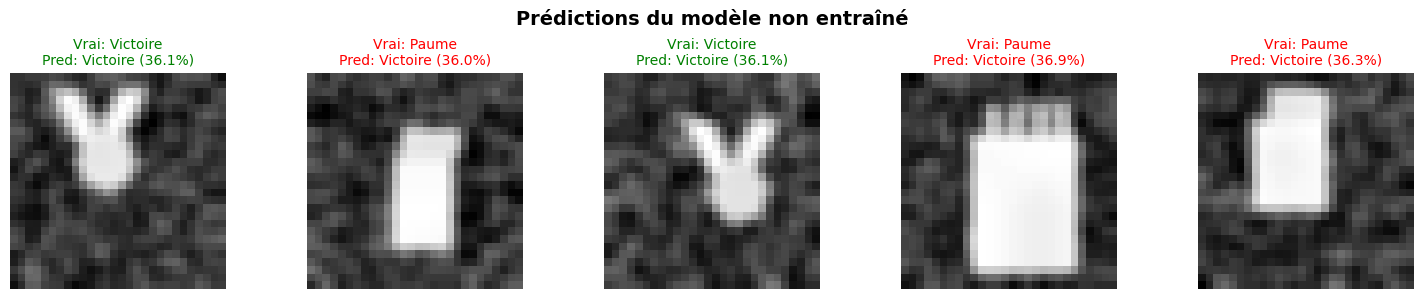


✅ Visualisation sauvegardée : results/plots/predictions_avant_entrainement.png


In [7]:
# =============================================================================
# TEST DE PRÉDICTION (avant entraînement)
# =============================================================================

print("\n" + "="*70)
print("🧪 TEST DE PRÉDICTION (MODÈLE NON ENTRAÎNÉ)")
print("="*70)

# Prendre quelques exemples
n_exemples = 5
exemples = X_train_final[:n_exemples]
labels_vrais = y_train_final[:n_exemples]

print(f"\n⏳ Prédiction sur {n_exemples} exemples...\n")

# Faire des prédictions
predictions = model.predict(exemples, verbose=0)

# Afficher les résultats
print(f"{'Exemple':<10} {'Vrai label':<15} {'Prédiction':<15} {'Confiance'}")
print("-" * 60)

for i in range(n_exemples):
    pred_classe = np.argmax(predictions[i])
    confiance = predictions[i][pred_classe] * 100
    
    print(f"{i+1:<10} {labels_vrais[i]:<15} {pred_classe:<15} {confiance:.2f}%")

print(f"\n💡 Note : Le modèle n'est PAS encore entraîné")
print(f"   Les prédictions sont aléatoires (poids initialisés aléatoirement)")
print(f"   Après l'entraînement, la précision devrait être > 90%")

# Visualisation
fig, axes = plt.subplots(1, n_exemples, figsize=(15, 3))
fig.suptitle('Prédictions du modèle non entraîné', fontsize=14, fontweight='bold')

noms_classes = {0: "Poing", 1: "Paume", 2: "Victoire"}

for i in range(n_exemples):
    axes[i].imshow(exemples[i, :, :, 0], cmap='gray')
    
    pred_classe = np.argmax(predictions[i])
    vrai_classe = labels_vrais[i]
    confiance = predictions[i][pred_classe] * 100
    
    couleur = 'green' if pred_classe == vrai_classe else 'red'
    
    axes[i].set_title(
        f"Vrai: {noms_classes[vrai_classe]}\n"
        f"Pred: {noms_classes[pred_classe]} ({confiance:.1f}%)",
        fontsize=10,
        color=couleur
    )
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('results/plots/predictions_avant_entrainement.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Visualisation sauvegardée : results/plots/predictions_avant_entrainement.png")

In [9]:
# =============================================================================
# SAUVEGARDE ET RÉSUMÉ
# =============================================================================

print("\n" + "="*70)
print("💾 SAUVEGARDE DU MODÈLE")
print("="*70)

# Créer le dossier models si nécessaire
os.makedirs('models', exist_ok=True)

# Sauvegarder l'architecture
model_json = model.to_json()
with open('models/model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

print(f"\n✅ Architecture sauvegardée : models/model_architecture.json")

# Sauvegarder les poids initiaux (optionnel)
# ✅ CORRECTION : Utiliser .weights.h5 au lieu de .h5
model.save_weights('models/model_initial.weights.h5')
print(f"✅ Poids initiaux sauvegardés : models/model_initial.weights.h5")

print(f"\n" + "="*70)
print("📋 RÉSUMÉ FINAL")
print("="*70)

print(f"\n✅ Modèle CNN créé et compilé avec succès")

print(f"\n📊 Architecture :")
print(f"   - 3 blocs convolutionnels")
print(f"   - 2 couches de max pooling")
print(f"   - 2 couches denses")
print(f"   - 1 couche de dropout (50%)")
print(f"   - Total paramètres : {total_params:,}")

print(f"\n📦 Données prêtes :")
print(f"   - Train      : {X_train_final.shape[0]} images")
print(f"   - Validation : {X_val.shape[0]} images")
print(f"   - Test       : {X_test.shape[0]} images")

print(f"\n📁 Fichiers créés :")
fichiers_crees = [
    'models/model_architecture.json',
    'models/model_initial.weights.h5',
    'results/plots/architecture_schema.png',
    'results/plots/predictions_avant_entrainement.png'
]

for fichier in fichiers_crees:
    if os.path.exists(fichier):
        taille = os.path.getsize(fichier) / 1024
        print(f"   ✅ {fichier} ({taille:.1f} KB)")
    else:
        print(f"   ⚠️ {fichier} (non créé)")

print(f"\n" + "="*70)
print("🎉 CONSTRUCTION DU MODÈLE TERMINÉE")
print("="*70)

print(f"\n➡️ Prochaine étape : 05_train_model.ipynb")
print(f"   Nous allons entraîner le modèle CNN sur nos données")
print(f"   avec augmentation de données en temps réel.")

print(f"\n💡 Note sur les fichiers :")
print(f"   - .json         : Architecture du modèle (structure)")
print(f"   - .weights.h5   : Poids du modèle (valeurs des paramètres)")
print(f"   Pour charger : model.load_weights('fichier.weights.h5')")


💾 SAUVEGARDE DU MODÈLE

✅ Architecture sauvegardée : models/model_architecture.json
✅ Poids initiaux sauvegardés : models/model_initial.weights.h5

📋 RÉSUMÉ FINAL

✅ Modèle CNN créé et compilé avec succès

📊 Architecture :
   - 3 blocs convolutionnels
   - 2 couches de max pooling
   - 2 couches denses
   - 1 couche de dropout (50%)
   - Total paramètres : 256,707

📦 Données prêtes :
   - Train      : 720 images
   - Validation : 180 images
   - Test       : 300 images

📁 Fichiers créés :
   ✅ models/model_architecture.json (6.3 KB)
   ✅ models/model_initial.weights.h5 (1034.3 KB)
   ✅ results/plots/architecture_schema.png (103.8 KB)
   ✅ results/plots/predictions_avant_entrainement.png (42.0 KB)

🎉 CONSTRUCTION DU MODÈLE TERMINÉE

➡️ Prochaine étape : 05_train_model.ipynb
   Nous allons entraîner le modèle CNN sur nos données
   avec augmentation de données en temps réel.

💡 Note sur les fichiers :
   - .json         : Architecture du modèle (structure)
   - .weights.h5   : Poids du 